In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\query.csv')

In [3]:
print(len(data))

628


In [4]:
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-03T03:06:57.764Z,52.7772,158.4839,105.631,6.5,mww,104.0,30.0,0.266,0.89,...,2023-04-04T03:16:03.524Z,NaN,earthquake,8.70,4.602,0.069,20.0,reviewed,us,us
1,2023-03-28T09:18:28.117Z,41.1480,142.8050,34.000,6.0,mww,175.0,44.0,0.906,0.73,...,2023-03-30T04:47:30.349Z,"129 km ENE of Misawa, Japan",earthquake,5.41,1.771,0.053,34.0,reviewed,us,us
2,2023-03-21T16:47:23.605Z,36.5186,70.9457,192.000,6.5,mww,164.0,12.0,2.510,0.93,...,2023-04-03T10:08:45.080Z,"Hindu Kush region, Afghanistan",earthquake,6.24,1.843,0.057,30.0,reviewed,us,us
3,2023-02-25T13:27:43.393Z,42.8435,144.9924,51.916,6.0,mww,146.0,32.0,1.591,0.63,...,2023-04-02T03:59:06.426Z,NaN,earthquake,7.58,1.442,0.052,35.0,reviewed,us,us
4,2023-02-23T00:37:38.620Z,38.0564,73.2299,11.742,6.9,mww,300.0,12.0,1.807,0.50,...,2023-03-21T17:11:17.019Z,"65 km WSW of Murghob, Tajikistan",earthquake,7.89,2.559,0.043,52.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2000-05-12T23:10:29.980Z,35.9750,70.6570,107.700,6.3,mwc,NaN,NaN,NaN,0.89,...,2022-04-29T18:38:47.069Z,"66 km NNW of P?r?n, Afghanistan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
624,2000-04-21T04:35:17.690Z,51.4220,-178.1370,33.000,6.0,mwc,NaN,NaN,NaN,0.92,...,2022-04-29T18:37:17.207Z,"115 km WSW of Adak, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
625,2000-02-13T02:57:08.720Z,42.8530,131.5720,513.600,6.0,mwc,NaN,NaN,NaN,0.80,...,2022-04-29T18:31:46.650Z,"15 km E of Slavyanka, Russia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
626,2000-01-28T14:21:07.340Z,43.0460,146.8370,61.100,6.8,mwc,NaN,NaN,NaN,0.85,...,2022-04-29T19:16:12.358Z,"84 km S of Shikotan, Russia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv


In [5]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt

<AxesSubplot:>

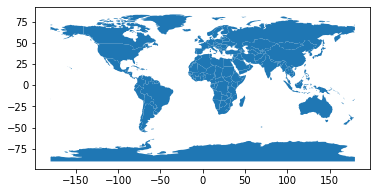

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [8]:
geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

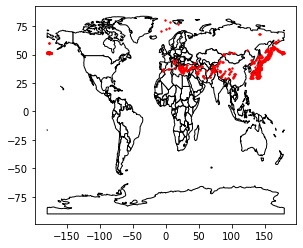

In [9]:
fig, ax = plt.subplots()
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=2)
plt.show()

In [10]:
data = data[(data.type == 'earthquake') & ( data.type != 'nuclear explosion')]
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2023-04-03T03:06:57.764Z,52.7772,158.4839,105.631,6.5,mww,104.0,30.0,0.266,0.89,...,NaN,earthquake,8.70,4.602,0.069,20.0,reviewed,us,us,POINT (158.48390 52.77720)
1,2023-03-28T09:18:28.117Z,41.1480,142.8050,34.000,6.0,mww,175.0,44.0,0.906,0.73,...,"129 km ENE of Misawa, Japan",earthquake,5.41,1.771,0.053,34.0,reviewed,us,us,POINT (142.80500 41.14800)
2,2023-03-21T16:47:23.605Z,36.5186,70.9457,192.000,6.5,mww,164.0,12.0,2.510,0.93,...,"Hindu Kush region, Afghanistan",earthquake,6.24,1.843,0.057,30.0,reviewed,us,us,POINT (70.94570 36.51860)
3,2023-02-25T13:27:43.393Z,42.8435,144.9924,51.916,6.0,mww,146.0,32.0,1.591,0.63,...,NaN,earthquake,7.58,1.442,0.052,35.0,reviewed,us,us,POINT (144.99240 42.84350)
4,2023-02-23T00:37:38.620Z,38.0564,73.2299,11.742,6.9,mww,300.0,12.0,1.807,0.50,...,"65 km WSW of Murghob, Tajikistan",earthquake,7.89,2.559,0.043,52.0,reviewed,us,us,POINT (73.22990 38.05640)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2000-05-12T23:10:29.980Z,35.9750,70.6570,107.700,6.3,mwc,NaN,NaN,NaN,0.89,...,"66 km NNW of P?r?n, Afghanistan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv,POINT (70.65700 35.97500)
624,2000-04-21T04:35:17.690Z,51.4220,-178.1370,33.000,6.0,mwc,NaN,NaN,NaN,0.92,...,"115 km WSW of Adak, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv,POINT (-178.13700 51.42200)
625,2000-02-13T02:57:08.720Z,42.8530,131.5720,513.600,6.0,mwc,NaN,NaN,NaN,0.80,...,"15 km E of Slavyanka, Russia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv,POINT (131.57200 42.85300)
626,2000-01-28T14:21:07.340Z,43.0460,146.8370,61.100,6.8,mwc,NaN,NaN,NaN,0.85,...,"84 km S of Shikotan, Russia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv,POINT (146.83700 43.04600)


In [11]:
feature_columns = ['latitude', 'longitude', 'depth']
X = data[feature_columns].values
y = data['mag'].values

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=23)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [98]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  5,  4,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [12,  5,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 6,  3,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 9,  2,  0,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 6,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 8,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 2,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [99]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 19.05 %.


In [100]:
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

<Figure size 432x288 with 0 Axes>

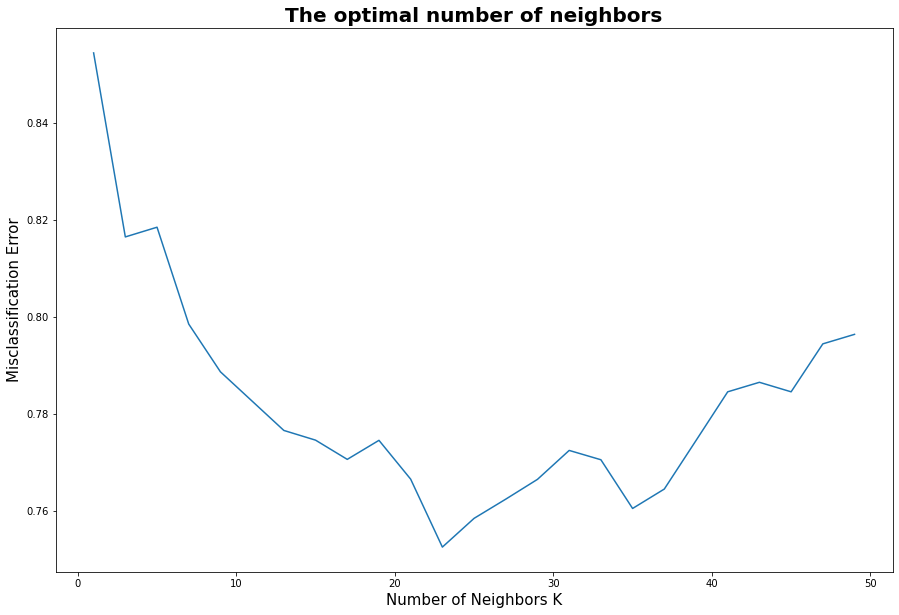

In [101]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
plt.plot(k_list, MSE)

plt.show()

In [115]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 23.


In [116]:
import scipy as sp

class MyKNeighborsClassifier():

    
    def __init__(self, n_neighbors=23):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):

        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [117]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [118]:
my_classifier = MyKNeighborsClassifier(n_neighbors=23)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 19.05 %.
